

### Linear Regression


---




 Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

dw.png

db.png

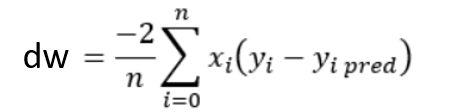




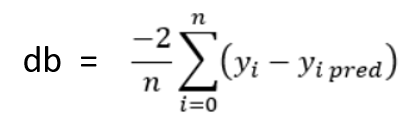


In [ ]:
# inporting the library

import numpy as np



Linear Regression

In [ ]:
class Linear_Regression():

# initating the paramaters (learning rate and no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # number of traning examples and number of features
    self.m, self.n = X.shape   # number of rows and column

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self, ):

    Y_prediction = self.predict(self.X)

    # calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db



  def predict(self, X):

    return X.dot(self.w) + self.b

using Linear Regression for prediction of a model


In [ ]:
# importing library
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data pre-processing

In [ ]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data (1).csv')

In [ ]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature & target

In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

Training the Linear Regression model



In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)


In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Predict the salary value for test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values & actual Values



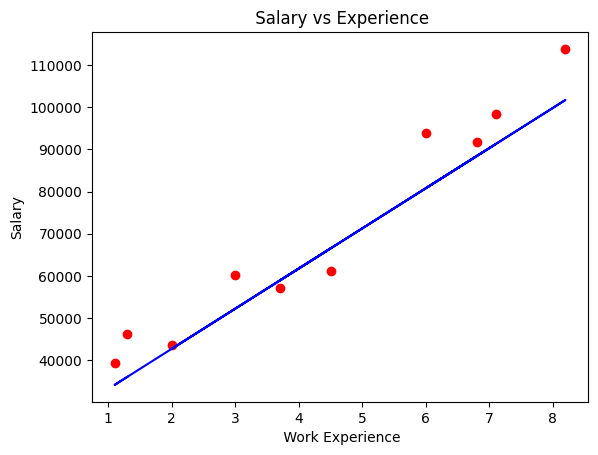

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()